**Simulated Annealing:** Simulated Annealing (SA) is a metaheuristic optimization algorithm that can be used to plan a cost-effective tour. 

The algorithm is inspired by the annealing process of slowly cooling a material to reduce defects and find the lowest energy state.

The basic idea behind SA is to start with a random initial solution and then slowly move towards a more optimal solution by making small changes to the current solution. The algorithm uses a probability function, called the acceptance probability, to determine whether or not to accept a new solution. The acceptance probability is based on the difference in cost between the current solution and the new solution, as well as a temperature parameter.

Cooling schedule will determine how quickly the temperature decreases as the algorithm progresses. The initial temperature should be high enough to allow the algorithm to explore a wide range of solutions, while the cooling schedule should be chosen so that the temperature decreases slowly enough to allow the algorithm to find a good solution, but quickly enough to avoid getting stuck in local minima.


*Cost Effective Tour of 20 citites in Rajasthan*


---



Algorithm Used : Simulated Annealing

Cooling function type : Normal 

Distance : Haversine

Best tour: [12, 16, 5, 2, 10, 18, 17, 0, 13, 1, 7, 9, 11, 6, 15, 14, 4, 19, 8, 3]
Best cost: 2079.61267253121


Text(0.5, 1.0, 'Best Tour')

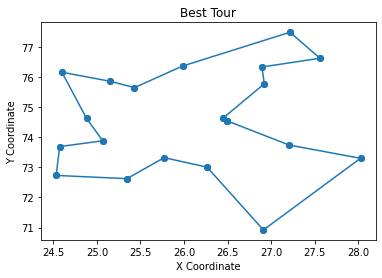

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# function to calculate the distance between two cities
def distance(city1, city2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1 = city1
    lat2, lon2 = city2

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    #haversine formula
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    distance = R * c
    return distance

# function to calculate the total cost of a tour
def cost(cities, tour):
    total = 0
    for i in range(len(tour)):
        total += distance(cities[tour[i]], cities[tour[i-1]])
    total += distance(cities[tour[-1]], cities[tour[0]])
    return total

# function to generate a random tour
def random_tour(cities):
    tour = list(range(len(cities)))
    random.shuffle(tour)
    return tour

# function to perform simulated annealing on a tour
def simulated_annealing(cities, tour, temp, cooling_rate):
    best_tour = tour
    best_cost = cost(cities, tour)
    while temp > 0.00001:
        # generate a new tour by swapping two cities
        i = random.randint(0, len(tour)-1)
        j = random.randint(0, len(tour)-1)
        new_tour = tour[:]
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        new_cost = cost(cities, new_tour)
        delta = new_cost - best_cost
        if delta < 0:
            # accept new tour if it has a lower cost
            best_tour = new_tour
            best_cost = new_cost
        else:
            # accept new tour with probability exp(-delta/temp)
            if random.random() < math.exp(-delta/temp):
                tour = new_tour
                best_cost = new_cost
        temp *= cooling_rate #normal cooling
    return best_tour, best_cost


# SA function with dynamic cooling schedule
# def simulated_annealing(cities, current_tour, temperature, cooling_rate):
#     best_tour = current_tour
#     best_cost = cost(cities, current_tour)
#     acceptance_rate = 0.5
#     while temperature > 1:
#         # Generate a new path
#         new_tour = random_tour(current_tour)
#         new_cost = cost(new_tour)

#         # Determine if we should accept
#         delta = new_cost - best_cost
#         if delta < 0:
#             best_tour = new_tour
#             best_cost = new_cost
#             acceptance_rate = 1
#         elif math.exp(-delta / temperature) < random.random():
#             current_tour = new_tour
#             acceptance_rate += (1 - acceptance_rate) * 0.01
#         else:
#             acceptance_rate -= acceptance_rate * 0.01

#         # Adjust the cooling rate based on the acceptance rate
#         if acceptance_rate < 0.3:
#             cooling_rate -= 0.01
#         elif acceptance_rate > 0.6:
#             cooling_rate += 0.01

#         # Cool the temperature
#         temperature *= cooling_rate
#     return best_tour,best_cost

# 20 cities
#Mt.Abu, Rajsamand, Jaisalmer, Ajmer, Alwar, Bikaner, Bundi, Chittorgarh, Jaipur
#Jhalawar, Jodhpur, Kota, Pushkar, Udaipur, Bharatpur, Sawai Madhopur, Nagaur,
#Jalore, Pali, Dausa
cities = [(24.531445, 72.733360),
(25.066700, 73.883301),
(26.911661, 70.922928),
(26.449896, 74.639915),
(27.560932, 76.625015),
(28.027138, 73.302155),
(25.430513, 75.649902),
(24.879999, 74.629997),
(26.922070, 75.778885),
(24.597349, 76.160980),
(26.263863, 73.008957),
(25.147743, 75.862839),
(26.489679, 74.550941),
(24.571270, 73.691544),
(27.216982, 77.489517),
(25.983334, 76.366669),
(27.207006, 73.742294),
(25.344481, 72.625374),
(25.771315, 73.323685),
(26.894478, 76.334824)]
tour = random_tour(cities)
best_tour, best_cost = simulated_annealing(cities, tour, 100, 0.9995)
print("Best tour:", best_tour)
print("Best cost:", best_cost)
x = []
y = []
for index in best_tour:
  x.append(cities[index][0])
  y.append(cities[index][1])

x.append(cities[best_tour[0]][0]) # add the first city to the end of the list
y.append(cities[best_tour[0]][1])

plt.scatter(x, y)
plt.plot(x, y, '-o')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Best Tour')


**FAQs**


---


1) How is Simulated Annealing a metaheuristic algorithm?

Ans. SA is a metaheuristic optimization algorithm because it uses a set of heuristics to guide the search process, such as the probability function used to accept or reject new solutions, the cooling schedule to control the temperature, and the neighborhood structure to generate new solutions(city swap).



---


2) Is SA a non-deterministic search algorithm?

Ans. Yes, because the algorithm uses randomness to explore the search space and make decisions about which solution to accept or reject.

This means that the algorithm can produce different results each time it is run, even with the same starting point and configuration.

---

3) What other cooling functions can be used?

Ans. Some examples of cooling schedules that can be defined are:

Exponential cooling(Kirkpatrick, Gelatt and Vecchi (1983)): The temperature is decreased exponentially over time. It is more efficient than linear cooling and can reach a low temperature faster, but it can also be too aggressive and cause the algorithm to converge too quickly.

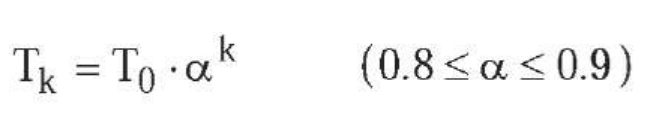

Logarithmic cooling(Aarts, E.H.L. & Korst, J., 1989): The temperature is decreased logarithmically over time. It is a good balance between exploration and exploitation and can produce good quality solutions.

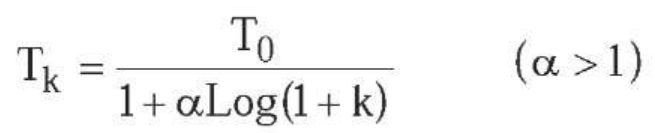

Dynamic cooling: It adjusts the cooling rate based on the current temperature and the acceptance rate of the candidate routes. For example, the cooling rate can be increased if the acceptance rate is too high, and decreased if the acceptance rate is too low.


---


4) How does this algorithm vary from Hill Climbing Algorithm?

Ans. The algorithm varies from Hill-Climbing in its decision of when to replace S, the original candidate solution, with R, its newly tweaked child. Specifically: if R is better than S, we’ll always replace S with R as usual. But if R is worse than S, we may still replace S with R with a certain probability.

— Page 23, Essentials of Metaheuristics, 2011.


---

5) What is the Metropolis Criteria for SA?

Ans. It is the acceptance probability, that allows the algorithm to escape from local minima when the temperature is high.

— Page 128, Algorithms for Optimization, 2019


---


6) Why did we take that particular cooling rate as in code?

Ans. When choosing the cooling rate, it is important to consider the trade-off between the computational cost and the quality of the solution.

We tried out different cooling rates, and found this to give better solutions.(So, Hit and Trial😛)


---


---

References:

1) Xin-She Yang, in Nature-Inspired Optimization Algorithms, 2014 (Metaheuristic Approaches)

2) Optimization by Simulated Annealing, 1983

Link-http://wexler.free.fr/library/files/kirkpatrick%20(1983)%20optimization%20by%20simulated%20annealing.pdf
